# ZUBER

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [173]:



import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
from datetime import datetime, timezone, timedelta

In [174]:
# Load the data file into a DataFrame
try:
    taxis = pd.read_csv('C:/Users/Lorenzo Santos/OneDrive/Documents/project_sql_result_01.csv')
    trips = pd.read_csv('C:/Users/Lorenzo Santos/OneDrive/Documents/project_sql_result_04.csv')
    rides = pd.read_csv('C:/Users/Lorenzo Santos/OneDrive/Documents/project_sql_result_07.csv')
except:
    taxis = pd.read_csv('/datasets/project_sql_result_01.csv')
    trips = pd.read_csv('/datasets/project_sql_result_04.csv')
    rides = pd.read_csv('/datasets/project_sql_result_07.csv')
    

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## TAXIS

In [175]:
# print the general/summary information about the DataFrame

taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [176]:
# Print a sample of data for taxis
taxis.head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### FIX DATA

[Describe what you see and notice in the general information and the printed data sample for the above data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

We can snake_case the company names. 

In [190]:
def underscore(name):
    new_name = name.split(' ')
    name = '_'.join(new_name)
    return name;
    
taxis['company_name'] = taxis['company_name'].apply(underscore).str.lower()
print(taxis[taxis.duplicated() == True])
print(taxis['company_name'].sort_values().unique())

Empty DataFrame
Columns: [company_name, trips_amount]
Index: []
['0118_-_42111_godfrey_s._awir' '1085_-_72312_n_and_w_cab_co'
 '1469_-_64126_omar_jada' '2092_-_61288_sbeih_company'
 '2192_-_73487_zeymane_corp' '2241_-_44667_-_felman_corp' '24_seven_taxi'
 '2733_-_74600_benny_jona' '2809_-_95474_c_&_d_cab_co_inc.'
 '2823_-_73307_lee_express_inc' '3011_-_66308_jbl_cab_inc.' '303_taxi'
 '3556_-_36214_rc_andrews_cab' '3591_-_63480_chuks_cab'
 '3620_-_52292_david_k._cab_corp.' '3623_-_72222_arrington_enterprises'
 '3721_-_santamaria_express' '4053_-_40193_adwar_h._nikola'
 '4615_-_83503_tyrone_henderson' '4623_-_27290_jay_kim'
 '5006_-_39261_salifu_bawa' '5062_-_34841_sam_mestas'
 '5074_-_54002_ahzmi_inc' '5874_-_73628_sergey_cab_corp.'
 '5997_-_65283_aw_services_inc.' '5_star_taxi' '6057_-_24657_richard_addo'
 '6574_-_babylon_express_inc.' '6742_-_83735_tasha_ride_inc'
 '6743_-_78771_luhak_corp' 'american_united'
 'american_united_taxi_affiliation' 'blue_diamond'
 'blue_ribbon_taxi_associa

No duplicates found

In [192]:
taxis

,company_name,trips_amount
0,flash_cab,19558
1,taxi_affiliation_services,11422
2,medallion_leasing,10367
3,yellow_cab,9888
4,taxi_affiliation_service_yellow,9299
...,...,...
59,4053_-_40193_adwar_h._nikola,7
60,2733_-_74600_benny_jona,7
61,5874_-_73628_sergey_cab_corp.,5
62,2241_-_44667_-_felman_corp,3


### ENRICH DATA

[Add additional factors to the data if you believe they might be useful.]

Nothing needed

In [193]:
#Nothing needed


## TRIPS

In [194]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [195]:
# Print a sample of data for trips
trips

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


### FIX DATA 

[Describe what you see and notice in the general information and the printed data sample for the above data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

average_trips should be int. no duplicates

In [187]:
trips['average_trips'] = trips['average_trips'].astype('int')
print(trips[trips.duplicated() == True])
print(trips['dropoff_location_name'].sort_values().unique())

Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []
['Albany Park' 'Andersonville' 'Archer Heights' 'Armour Square' 'Ashburn'
 'Auburn Gresham' 'Austin' 'Avalon Park' 'Avondale' 'Belmont Cragin'
 'Beverly' 'Boystown' 'Bridgeport' 'Brighton Park' 'Bucktown' 'Burnside'
 'Calumet Heights' 'Chatham' 'Chicago Lawn' 'Chinatown' 'Clearing'
 'Douglas' 'Dunning' 'East Side' 'East Village' 'Edgewater' 'Edison Park'
 'Englewood' 'Fuller Park' 'Gage Park' 'Garfield Park' 'Garfield Ridge'
 'Gold Coast' 'Grand Boulevard' 'Grand Crossing' 'Grant Park' 'Hegewisch'
 'Hermosa' 'Humboldt Park' 'Hyde Park' 'Irving Park' 'Jackson Park'
 'Jefferson Park' 'Kenwood' 'Lake View' 'Lincoln Park' 'Lincoln Square'
 'Little Italy, UIC' 'Little Village' 'Logan Square' 'Loop'
 'Lower West Side' 'Mckinley Park' 'Montclare' 'Morgan Park'
 'Mount Greenwood' 'Museum Campus' 'Near South Side' 'New City'
 'North Center' 'North Lawndale' 'North Park' 'Norwood Park' "O'Hare"
 'Oakland' 'Old Town' 'Porta

No duplicates found

In [196]:
trips

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


### ENRICH DATA

[Add additional factors to the data if you believe they might be useful.]

Nothing needed

In [197]:
#Nothing needed

## ANALYZE DATA

[make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs]

In [198]:
trips.sort_values(by='average_trips',ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


<AxesSubplot:title={'center':'the number of rides for each taxi company on November 15-16, 2017'}, xlabel='taxi company name'>

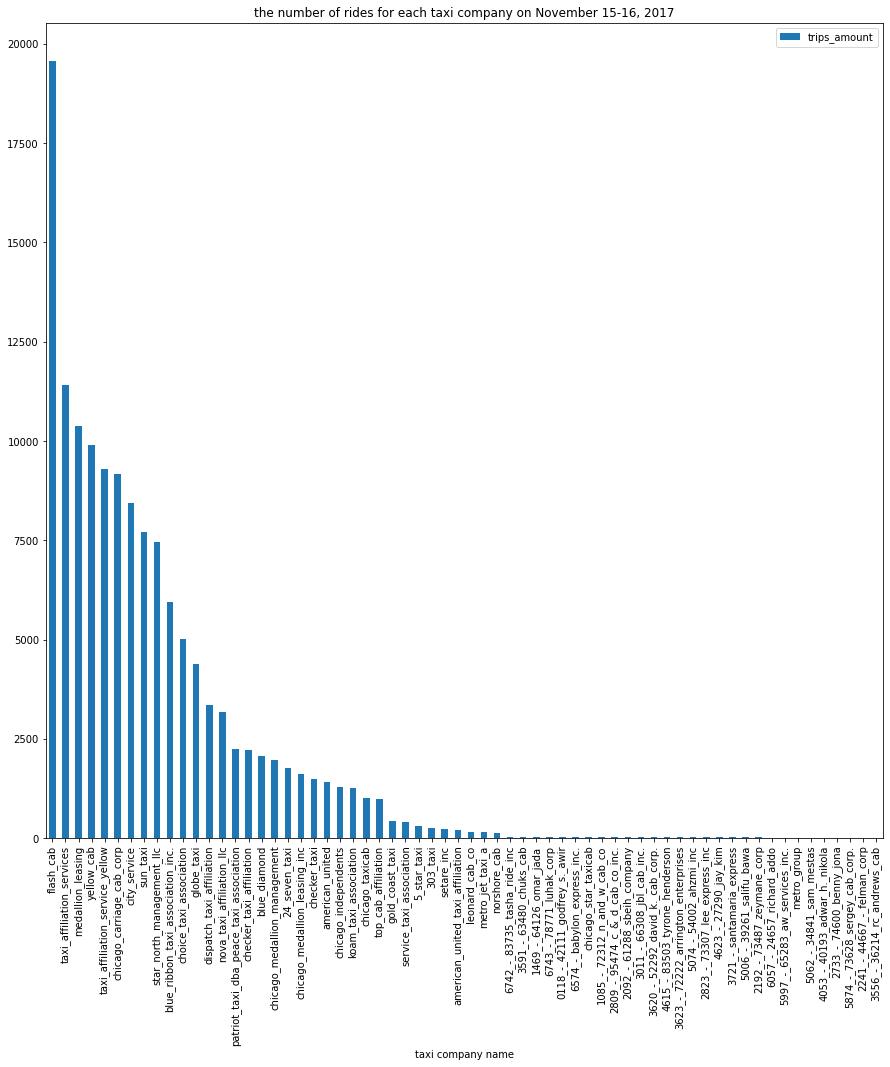

In [199]:
taxis.plot(x='company_name',xlabel='taxi company name',y='trips_amount',kind='bar',figsize=(15,15),title='the number of rides for each taxi company on November 15-16, 2017')


<AxesSubplot:title={'center':'the average number of rides that ended in each neighborhood in November 2017'}, xlabel='Chicago neighborhoods where rides ended'>

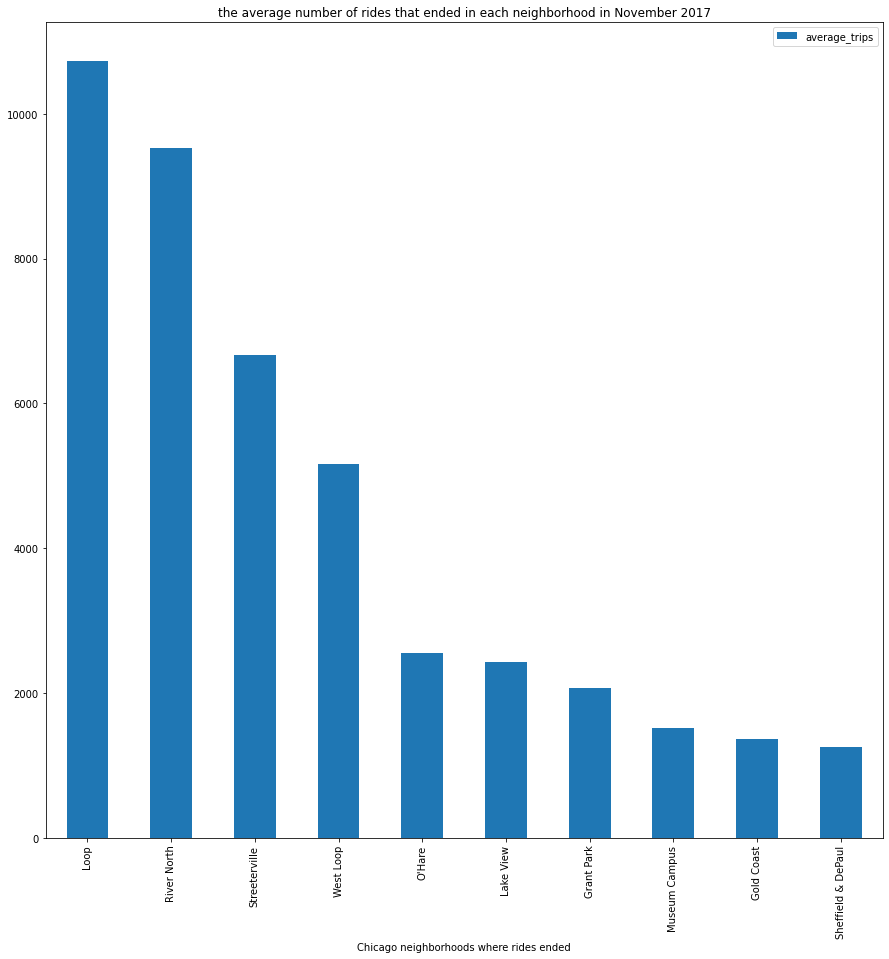

In [200]:
trips.sort_values(by='average_trips',ascending=False).head(10).plot(x='dropoff_location_name',xlabel='Chicago neighborhoods where rides ended',y='average_trips',kind='bar',figsize=(15,15),title='the average number of rides that ended in each neighborhood in November 2017')

<AxesSubplot:title={'center':'the number of rides for each taxi company on November 15-16, 2017'}, xlabel='taxi company name'>

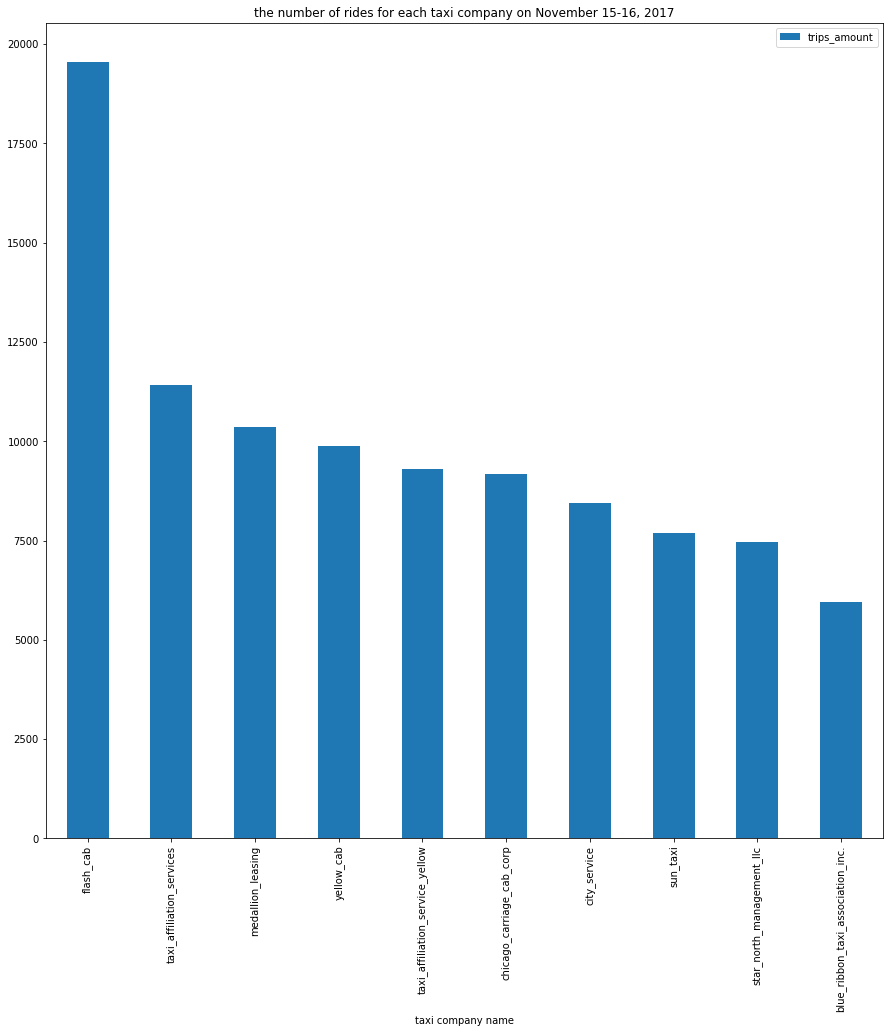

In [201]:
taxis.head(10).plot(x='company_name',xlabel='taxi company name',y='trips_amount',kind='bar',figsize=(15,15),title='the number of rides for each taxi company on November 15-16, 2017')

In [202]:
list(trips['dropoff_location_name'].head(10))

['Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

[draw conclusions based on each graph and explain the results]

Every taxi company with zipcodes does extremely poorly compared to the ones without zipcodes. 

The taxi leading companies are 'flash_cab','taxi_affiliation_services','medallion_leasing','yellow_cab','taxi_affiliation_service_yellow','chicago_carriage_cab_corp','city_service','sun_taxi','star_north_management_llc' and 'blue_ribbon_taxi_association_inc.'

The top dropoff locations in Chicago are 'Loop','River North','Streeterville','West Loop',"O'Hare",'Lake View','Grant Park','Museum Campus','Gold Coast' and 'Sheffield & DePaul'.

## Rides


In [203]:
rides

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


### Fix Data

[Describe what you see and notice in the general information and the printed data sample for the above data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

start_ts should be datetime.

In [204]:
rides['start_ts'] = pd.to_datetime(rides['start_ts'],format='%Y-%m-%d %H:%M:%S')
#rides['duration_seconds'] = pd.to_timedelta(rides['duration_seconds'],unit='s')

In [205]:
# Print a sample of data for rides
rides

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

The day shown will help alot. Lowercase the weather conditions and day

In [206]:
def day_of_the_week(day):
    if day.weekday() == 0:
        return 'monday'
    elif day.weekday() == 1:
        return 'tuesday'
    elif day.weekday() == 2:
        return 'wednesday'
    elif day.weekday() == 3:
        return 'thursday'
    elif day.weekday() == 4:
        return 'friday'
    elif day.weekday() == 5:
        return 'saturday'
    else:
        return 'sunday'
    

rides['weekday'] = rides['start_ts'].apply(day_of_the_week)
rides['weather_conditions'] = rides['weather_conditions'].str.lower()

In [207]:
rides

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,good,2410.0,saturday
1,2017-11-25 14:00:00,good,1920.0,saturday
2,2017-11-25 12:00:00,good,1543.0,saturday
3,2017-11-04 10:00:00,good,2512.0,saturday
4,2017-11-11 07:00:00,good,1440.0,saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,good,0.0,saturday
1064,2017-11-11 10:00:00,good,1318.0,saturday
1065,2017-11-11 13:00:00,good,2100.0,saturday
1066,2017-11-11 08:00:00,good,1380.0,saturday


We can assume safely its all saturdays.

In [221]:
rides = rides[rides.duplicated() != True]
rides[rides['duration_seconds'].isna() != True]

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,good,2410.0,saturday
1,2017-11-25 14:00:00,good,1920.0,saturday
2,2017-11-25 12:00:00,good,1543.0,saturday
3,2017-11-04 10:00:00,good,2512.0,saturday
4,2017-11-11 07:00:00,good,1440.0,saturday
...,...,...,...,...
1060,2017-11-04 14:00:00,good,2700.0,saturday
1061,2017-11-18 16:00:00,bad,2186.0,saturday
1063,2017-11-25 11:00:00,good,0.0,saturday
1064,2017-11-11 10:00:00,good,1318.0,saturday


### Check for outliers

count     148.000000
mean     2409.229730
std       751.544705
min       480.000000
25%      1746.000000
50%      2463.500000
75%      2940.000000
max      4980.000000
Name: duration_seconds, dtype: float64


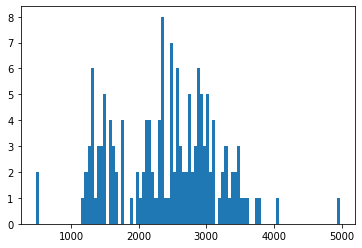

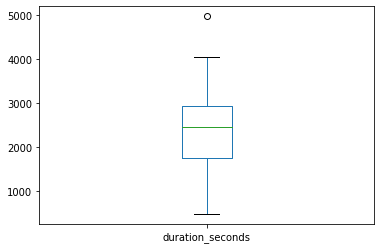

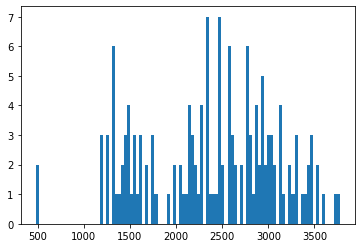


count     723.000000
mean     2032.253112
std       773.444860
min         0.000000
25%      1435.500000
50%      1883.000000
75%      2491.500000
max      7440.000000
Name: duration_seconds, dtype: float64


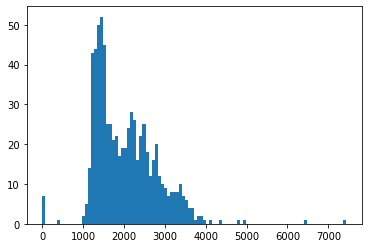

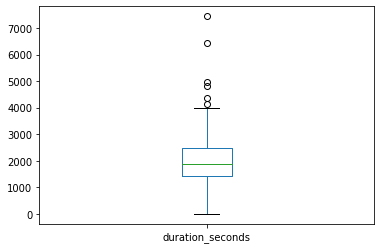

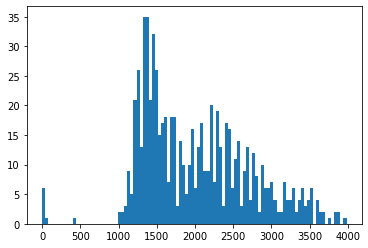

In [217]:
print(rides[rides['weather_conditions'] == 'bad']['duration_seconds'].describe())
rides[rides['weather_conditions'] == 'bad']['duration_seconds'].hist(bins=100,grid=False)
plt.show()
rides[rides['weather_conditions'] == 'bad']['duration_seconds'].plot(kind='box')
plt.show()
rides[(rides.weather_conditions == 'bad') & (rides.duration_seconds <= 4000)]['duration_seconds'].hist(bins=100,grid=False)
plt.show()
print()
print(rides[rides['weather_conditions'] == 'good']['duration_seconds'].describe())
rides[rides['weather_conditions'] == 'good']['duration_seconds'].hist(bins=100,grid=False)
plt.show()
rides[rides['weather_conditions'] == 'good']['duration_seconds'].plot(kind='box')
plt.show()
rides[(rides.weather_conditions == 'good') & (rides.duration_seconds <= 4000)]['duration_seconds'].hist(bins=100,grid=False)
plt.show()


There are outliers past 4000 for good and bad weather. 

### Test Hypothesis


[Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."]

In [225]:
# Test the hypotheses
rides_without_outliers = rides[rides['duration_seconds'] <= 4000]
#print(rides_without_outliers)

sample1 = list(rides_without_outliers.query('weather_conditions == "good"')['duration_seconds'])
sample2 = list(rides_without_outliers.query('weather_conditions == "bad"')['duration_seconds']) #We do not need to use .head() to make samples equal in sizes. ttest_ind can work with samples of different sizes.
#print(sample1)
#print(sample2)

results = st.ttest_ind(sample1, sample2, equal_var = True)

alpha = 0.05 

print('p-value: ', results.pvalue)

if results.pvalue < alpha: #H1, the alt hypothesis means that the means of both populations are different.
    print('We cannot reject the alt hypothesis')
    print("The means of both are the different.")
else:
    print('We reject the alt hypothesis')
    print("The means of both are the same.")
    

p-value:  6.6297390839448354e-09
We cannot reject the alt hypothesis
The means of both are the different.


[Explain:
how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why]

I formed the alt hypothesis (Alt = Not same, The proposal that the average duration is not the same on rainy days) by comparing days with good weather conditions to days with bad conditions. We reject the alt hypothesis
The means of both are the same outside of outliers.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

The top taxi companies are 'flash_cab','taxi_affiliation_services','medallion_leasing','yellow_cab','taxi_affiliation_service_yellow','chicago_carriage_cab_corp','city_service','sun_taxi','star_north_management_llc' and 'blue_ribbon_taxi_association_inc.'

The top neighborhood dropoffs are 'Loop','River North','Streeterville','West Loop',"O'Hare",'Lake View','Grant Park','Museum Campus','Gold Coast' and 'Sheffield & DePaul'.

The average duration of rides from the Loop to O'Hare International Airport doesn't change on rainy Saturdays.